In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from openbb_terminal.sdk import openbb
from openbb_terminal.sdk import TerminalStyle
theme = TerminalStyle("light", "light", "light")

ModuleNotFoundError: No module named 'openbb_terminal'

In [3]:
df1 = pd.read_csv('NASDAQ Composite Historical Data 1.csv')
df2 = pd.read_csv('NASDAQ Composite Historical Data 2.csv')
df3 = pd.read_csv('NASDAQ Composite Historical Data 3.csv')
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])
df3['Date'] = pd.to_datetime(df3['Date'])

df1 = df1.set_index(['Date'])
df2 = df2.set_index(['Date'])
df3 = df3.set_index(['Date'])


df_nas = df1.combine_first(df2).combine_first(df3)
df_nas['Price'] = df_nas['Price'].str.replace(',','').astype(float)

df_nas = df_nas.reset_index().reset_index()
df_nas = df_nas.set_index('Date')[['index','Price']]

df_nas['price_pct_add'] = df_nas['Price'].pct_change().cumsum()
df_nas['price_pct_mul'] = df_nas['Price'].pct_change().add(1).cumprod()
df_nas = df_nas.dropna()
df_nas

,index,Price,price_pct_add,price_pct_mul
Date,,,,
1980-03-19,1,139.97,0.007558,1.007558
1980-03-20,2,139.64,0.005201,1.005183
1980-03-21,3,138.80,-0.000815,0.999136
1980-03-24,4,134.61,-0.031002,0.968975
1980-03-25,5,132.52,-0.046528,0.953930
...,...,...,...,...
2023-01-30,10804,11393.81,5.398719,82.017060
2023-01-31,10805,11584.55,5.415460,83.390081
2023-02-01,10806,11816.32,5.435467,85.058451


In [4]:
x = df_nas['index']
y = df_nas['price_pct_add']

#p = np.polyfit(x, y, 1)
p = np.poly1d(np.polyfit(x, y, 1))
df_nas['price_pct_add_lin'] = p(x)

<AxesSubplot:xlabel='Date'>

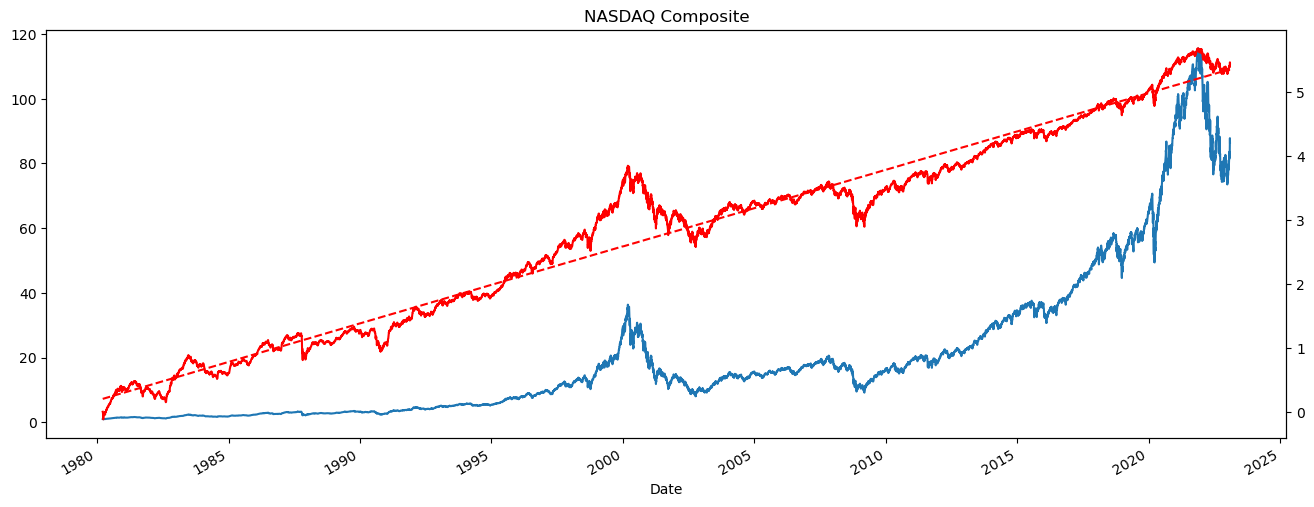

In [5]:
f, ax = plt.subplots(figsize=(16, 6))
ax2 = ax.twinx()
df_nas['price_pct_mul'].plot(ax = ax, title = 'NASDAQ Composite')
df_nas['price_pct_add'].plot(ax = ax2, color= 'r')
df_nas['price_pct_add_lin'].plot(ax = ax2, color= 'r', ls='--')
#ax.legend(loc='upper right')


In [6]:
df1 = pd.read_csv('OMX Stockholm 30 Historical Data 1.csv')
df2 = pd.read_csv('OMX Stockholm 30 Historical Data 2.csv')
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

df1 = df1.set_index(['Date'])
df2 = df2.set_index(['Date'])

df_omx = df1.combine_first(df2)
df_omx['Price'] = df_omx['Price'].str.replace(',','').astype(float)

df_omx = df_omx.reset_index().reset_index()
df_omx = df_omx.set_index('Date')[['index','Price']]
df_omx#.info()

,index,Price
Date,,
1986-10-01,0,125.93
1986-10-02,1,126.25
1986-10-03,2,126.69
1986-10-06,3,128.16
1986-10-07,4,129.84
...,...,...
2023-01-31,9122,2198.54
2023-02-01,9123,2210.13
2023-02-02,9124,2287.40


In [9]:
df_omx['price_pct_add'] = df_omx['Price'].pct_change().cumsum()
df_omx['price_pct_mul'] = df_omx['Price'].pct_change().add(1).cumprod()
df_omx = df_omx.dropna()
df_omx

,index,Price,price_pct_add,price_pct_mul
Date,,,,
1986-10-02,1,126.25,0.002541,1.002541
1986-10-03,2,126.69,0.006026,1.006035
1986-10-06,3,128.16,0.017629,1.017708
1986-10-07,4,129.84,0.030738,1.031049
1986-10-08,5,130.90,0.038902,1.039466
...,...,...,...,...
2023-01-31,9122,2198.54,3.769610,17.458429
2023-02-01,9123,2210.13,3.774882,17.550465
2023-02-02,9124,2287.40,3.809844,18.164059


In [10]:
x = df_omx['index']
y = df_omx['price_pct_add']


#p = np.polyfit(x, y, 1)
p = np.poly1d(np.polyfit(x, y, 2))
df_omx['price_pct_add_lin'] = p(x)

C:\Users\ohjartarson\AppData\Local\Temp\ipykernel_17752\1269438253.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_omx['price_pct_add_lin'] = p(x)


<AxesSubplot:xlabel='Date'>

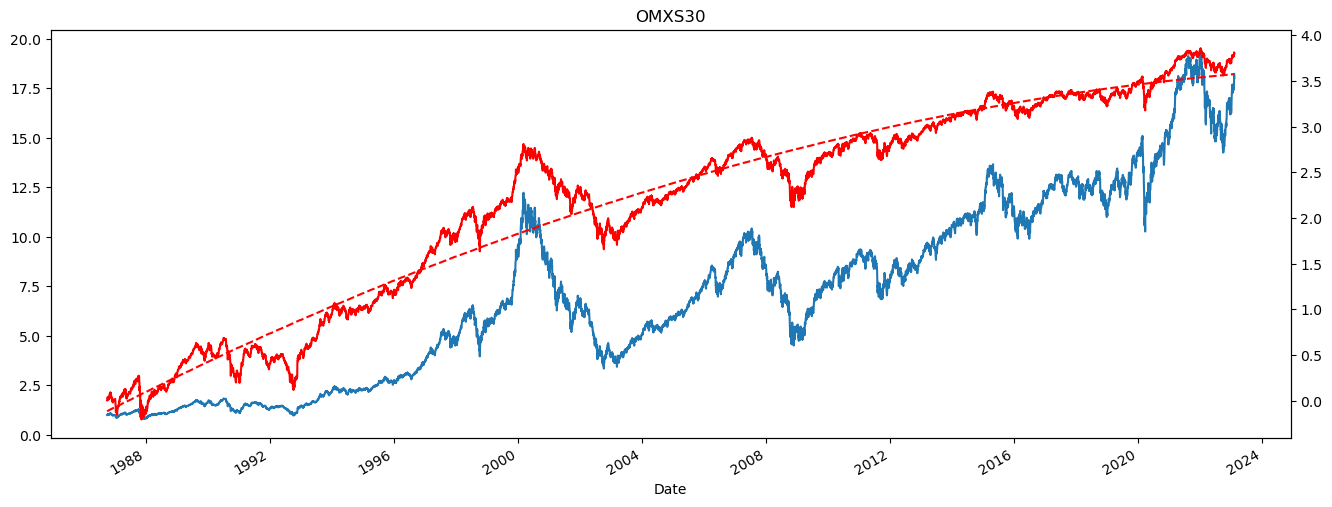

In [11]:
f, ax = plt.subplots(figsize=(16, 6))
ax2 = ax.twinx()
df_omx['price_pct_mul'].plot(ax = ax, title = 'OMXS30')
df_omx['price_pct_add'].plot(ax = ax2, color= 'r')
df_omx['price_pct_add_lin'].plot(ax = ax2, color= 'r', ls='--')
#ax.legend(loc='upper right')

<AxesSubplot:title={'center':'OMXS30'}, xlabel='Date'>

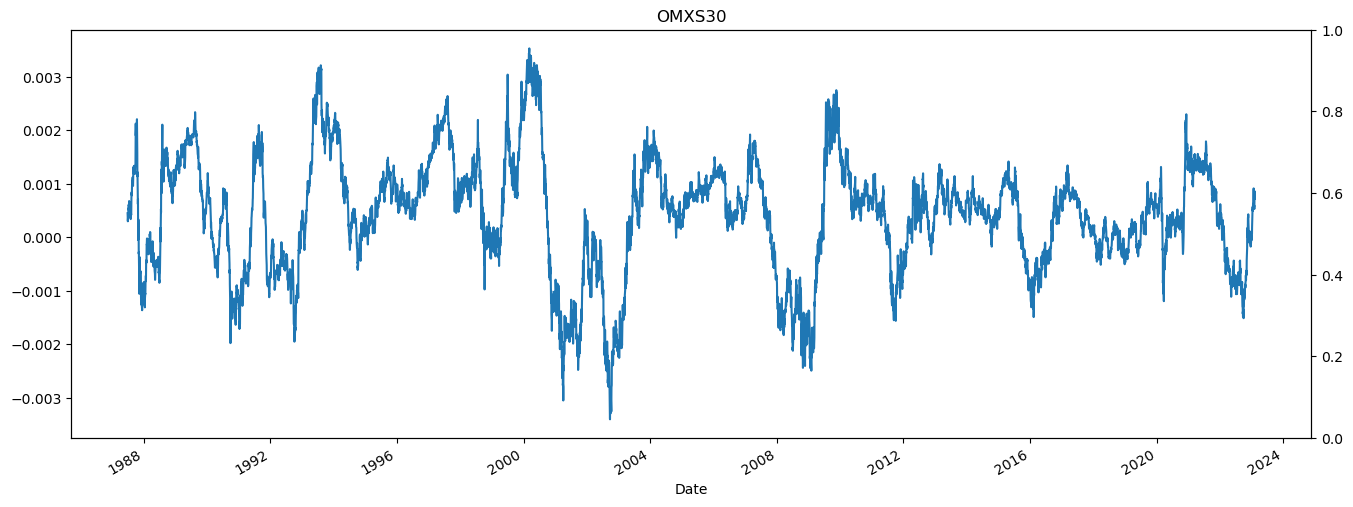

In [14]:
f, ax = plt.subplots(figsize=(16, 6))
ax2 = ax.twinx()
df_omx['Price'].pct_change().rolling(180).mean().plot(ax = ax, title = 'OMXS30')

<AxesSubplot:xlabel='Date'>

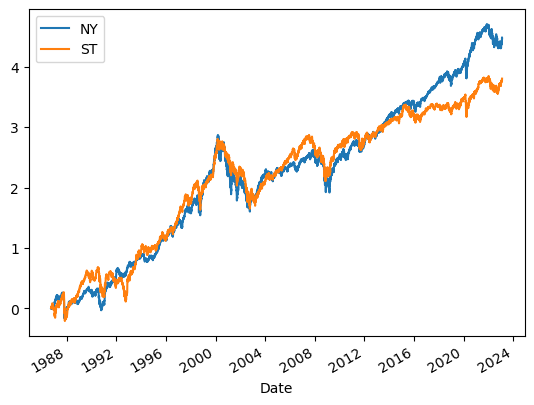

In [20]:
df_comb = pd.concat([df_nas['Price'].rename('NY'), df_omx['Price'].rename('ST')], axis=1).dropna()
df_comb.pct_change().cumsum().plot()

In [140]:
df1 = pd.read_csv('S&P 500 Historical Data 1.csv')
df2 = pd.read_csv('S&P 500 Historical Data 2.csv')
df3 = pd.read_csv('S&P 500 Historical Data 3.csv')
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])
df3['Date'] = pd.to_datetime(df3['Date'])

df1 = df1.set_index(['Date'])
df2 = df2.set_index(['Date'])
df3 = df3.set_index(['Date'])


df_sp = df1.combine_first(df2).combine_first(df3)
df_sp['Price'] = df_sp['Price'].str.replace(',','').astype(float)

df_sp = df_sp.reset_index().reset_index()
df_sp = df_sp.set_index('Date')[['index','Price']]

df_sp['price_pct_add'] = df_sp['Price'].pct_change().cumsum()
df_sp['price_pct_mul'] = df_sp['Price'].pct_change().add(1).cumprod()
df_sp = df_sp.dropna()
df_sp

,index,Price,price_pct_add,price_pct_mul
Date,,,,
1979-12-27,1,108.00,0.001855,1.001855
1979-12-28,2,107.80,0.000003,1.000000
1979-12-31,3,107.90,0.000931,1.000928
1980-01-01,4,107.90,0.000931,1.000928
1980-01-02,5,105.80,-0.018531,0.981447
...,...,...,...,...
2023-01-31,10869,4076.60,4.338577,37.816327
2023-02-01,10870,4119.21,4.349029,38.211596
2023-02-02,10871,4179.76,4.363729,38.773284


In [141]:
x = df_sp['index']
y = df_sp['price_pct_add']

#p = np.polyfit(x, y, 1)
p = np.poly1d(np.polyfit(x, y, 1))
df_sp['price_pct_add_lin'] = p(x)

<AxesSubplot: xlabel='Date'>

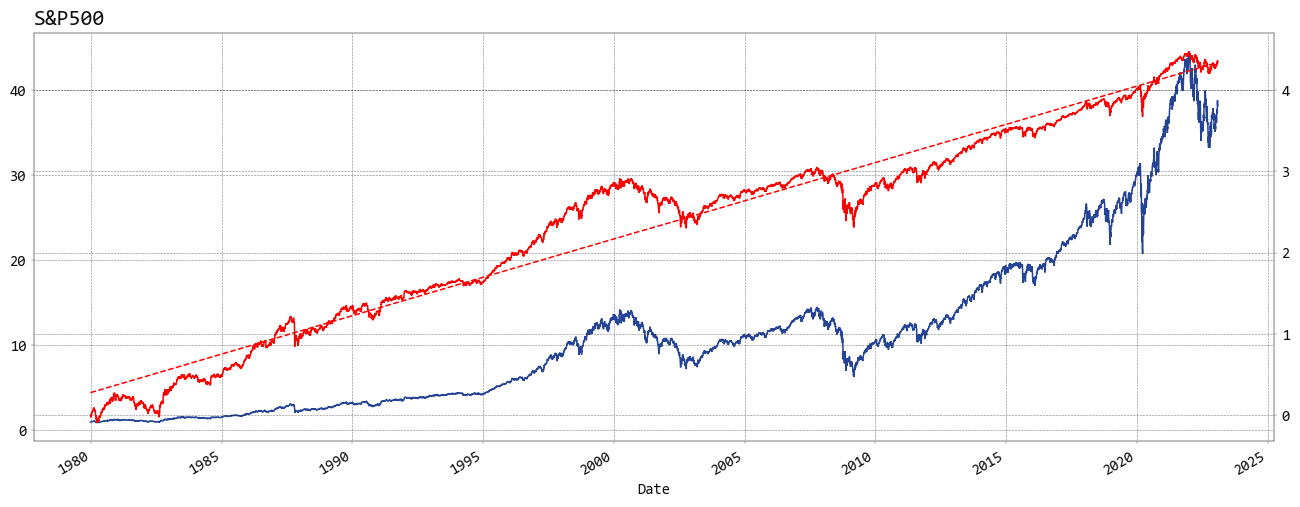

In [142]:
f, ax = plt.subplots(figsize=(16, 6))
ax2 = ax.twinx()
df_sp['price_pct_mul'].plot(ax = ax, title = 'S&P500')
df_sp['price_pct_add'].plot(ax = ax2, color= 'r')
df_sp['price_pct_add_lin'].plot(ax = ax2, color= 'r', ls='--')
#ax.legend(loc='upper right')


<AxesSubplot: xlabel='Date'>

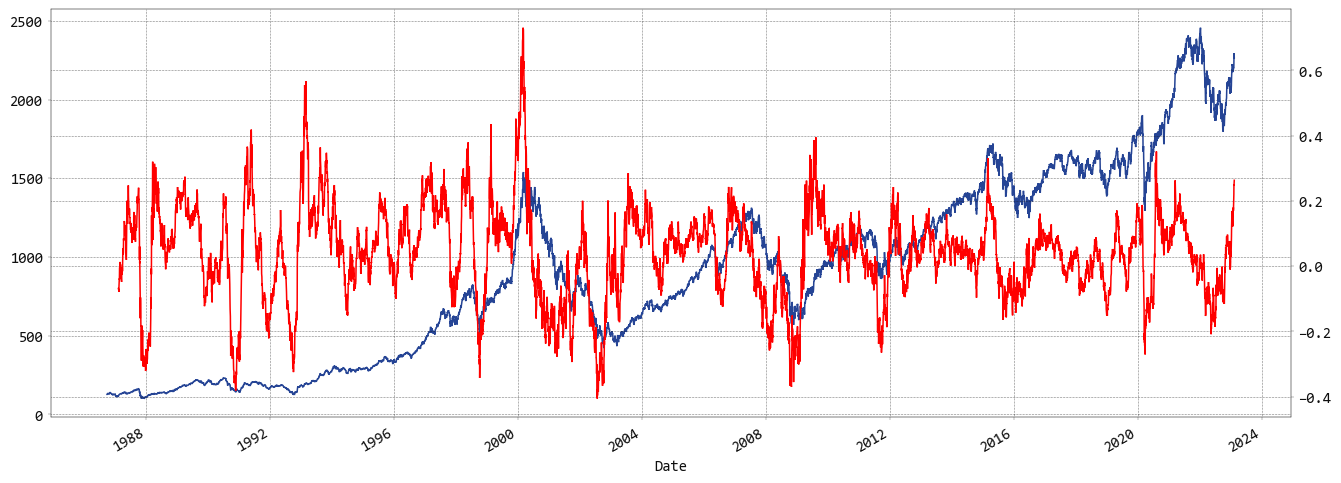

In [201]:
f, ax = plt.subplots(figsize=(16, 6))
df_omx['Price'].plot(ax=ax)
ax2 = ax.twinx()
df_omx['Price'].pct_change(periods=90).plot(ax=ax2, color='r')

In [179]:
df_omx[df_omx.index > '2022-09-15'][['Price']].idxmin()

Price   2022-09-29
dtype: datetime64[ns]

In [193]:
df_omx[df_omx.index>'2022-09-29']

,index,Price,price_pct_add,price_pct_mul,price_pct_add_lin
Date,,,,,
2022-09-30,9037,1828.98,3.579966,14.523783,3.563373
2022-10-03,9038,1839.51,3.585723,14.607401,3.563500
2022-10-04,9039,1909.64,3.623848,15.164298,3.563626
2022-10-05,9040,1882.92,3.609856,14.952116,3.563753
2022-10-06,9041,1883.04,3.609919,14.953069,3.563879
...,...,...,...,...,...
2023-01-31,9122,2198.54,3.769610,17.458429,3.573915
2023-02-01,9123,2210.13,3.774882,17.550465,3.574036
2023-02-02,9124,2287.40,3.809844,18.164059,3.574157


<AxesSubplot: xlabel='Date'>

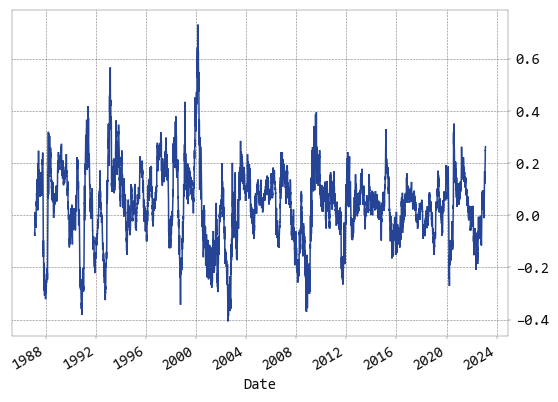